
Working Hours vs Income:
 hours-per-week
5     0.176471
6     0.054054
7     0.111111
8     0.051546
9     0.062500
        ...   
72    0.357143
73    0.500000
74    0.000000
75    0.305085
76    0.500000
Name: income_num, Length: 70, dtype: float64

Education vs Income:
 education-num
3     0.041045
4     0.062992
5     0.050459
6     0.058901
7     0.053213
8     0.070423
9     0.152875
10    0.188779
11    0.250000
12    0.242263
13    0.396853
14    0.537535
15    0.706173
16    0.715753
Name: income_num, dtype: float64

Age vs Income:
 age
17    0.000000
18    0.000000
19    0.001795
20    0.000000
21    0.001709
        ...   
73    0.116279
74    0.310345
75    0.172414
76    0.068966
77    0.157895
Name: income_num, Length: 61, dtype: float64

Correlation with Income:
 income_num        1.000000
capital-gain      0.339924
education-num     0.318695
age               0.245832
hours-per-week    0.231651
fnlwgt           -0.009556
capital-loss     -0.017254
Name: income_num, dty

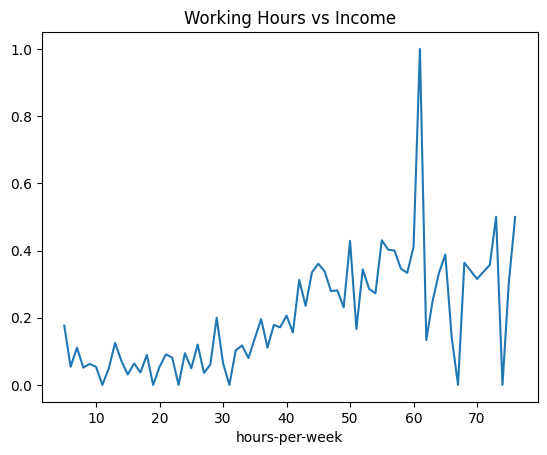

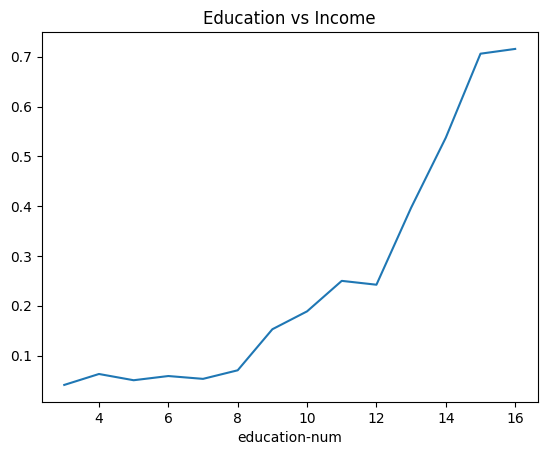

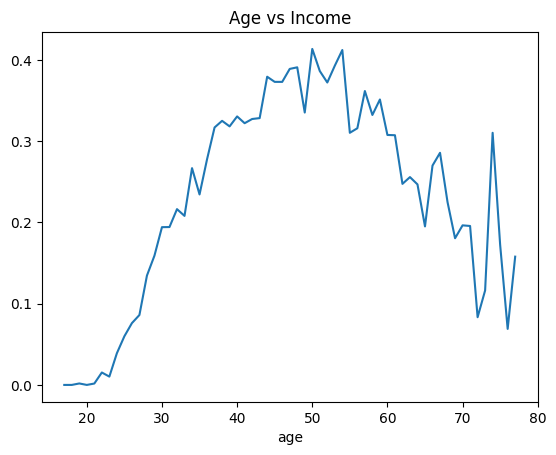


Logistic Regression
Accuracy : 0.8588235294117647
Precision: 0.7379784102060843
Recall   : 0.5944664031620553
F1 Score : 0.658493870402802

Decision Tree
Accuracy : 0.8041628959276018
Precision: 0.5712062256809338
Recall   : 0.5802371541501976
F1 Score : 0.5756862745098039

Best Model: Logistic Regression


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Load Dataset
cols = ["age","workclass","fnlwgt","education","education-num",
        "marital-status","occupation","relationship","race","sex",
        "capital-gain","capital-loss","hours-per-week","native-country","income"]

df = pd.read_csv("adult.data", names=cols, skipinitialspace=True)

# 2. Data Cleaning
df = df.replace("?", np.nan).dropna()

# 3. Remove Outliers
num_cols = df.select_dtypes(include=np.number)
z = np.abs(stats.zscore(num_cols))
df = df[(z < 3).all(axis=1)]

# 4. Encode Target
df["income_num"] = df["income"].map({">50K":1,"<=50K":0})

# 5. EDA (Business Analysis)
print("\nWorking Hours vs Income:\n", df.groupby("hours-per-week")["income_num"].mean())
print("\nEducation vs Income:\n", df.groupby("education-num")["income_num"].mean())
print("\nAge vs Income:\n", df.groupby("age")["income_num"].mean())

numeric_df = df.select_dtypes(include=["int64","float64"])
print("\nCorrelation with Income:\n", numeric_df.corr()["income_num"].sort_values(ascending=False))

# 6. Visualizations
df.groupby("hours-per-week")["income_num"].mean().plot(title="Working Hours vs Income")
plt.show()

df.groupby("education-num")["income_num"].mean().plot(title="Education vs Income")
plt.show()

df.groupby("age")["income_num"].mean().plot(title="Age vs Income")
plt.show()

# 7. Feature Engineering
X = df.drop(["income","income_num"], axis=1)
y = df["income_num"]
X = pd.get_dummies(X, drop_first=True)

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 10. Train Models
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 11. Evaluation
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)

# 12. Best Model
if accuracy_score(y_test, lr_pred) > accuracy_score(y_test, dt_pred):
    print("\nBest Model: Logistic Regression")
else:
    print("\nBest Model: Decision Tree")
